In [1]:
from sklearn.cluster import KMeans #군집분석을 위한 라이브러리 import
import numpy as np
import pandas as pd                 #필요한 라이브러리 import
import matplotlib.pyplot as plt    #그래프 시각화를 위한 matplotlib import
import seaborn as sns              #그래프 시각화를 위한 seaborn import
#plt.style.use('seaborn')           #스타일 적용
#sns.set_palette("pastel")          #색을 파스텔 톤으로 적용

from matplotlib import font_manager, rc #한글 폰트를 사용하기 위한 라이브러리 import
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name() #font_manager를통해 경로에 있는 malgun 폰트를 font_name에 저장
rc('font', family=font_name) #폰트 적용

import warnings
warnings.filterwarnings('ignore')            #경고무시

# 데이터 불러오기
df = pd.read_csv('C:\data\Gwangju_dong.csv')   #csv파일을 데이터 프레임 형태로 가져온다.
df.head() #가져온 데이터의 5열을 출력


,구,동,인구밀도,1020인구,버스인구,유동인구
0,서구,양동,12258.175,1246,1271213,41731
1,서구,농성동,11356.210,3110,2318259,134868
2,서구,광천동,7546.900,1442,5638352,169425
3,서구,유덕동,2004.190,2338,2607,141329
4,서구,치평동,9526.910,7149,4158742,254355


In [2]:
data = df.iloc[:, [2, 3, 5]]
print(data.head())

def change_n_clusters(n_clusters, data): #엘보우 분석
    sum_of_squared_distance = []         #빈 배열 생성
    for n_cluster in n_clusters:         #for문, 군집의 갯수 1,2,3,4일때가 각각 들어감
        kmeans = KMeans(n_clusters=n_cluster) #kemans에 k를 1,2,3,4로 넣어서 분석 실시
        kmeans.fit(data)
        sum_of_squared_distance.append(kmeans.inertia_)   #각 군집의 응집도를 나타낸 값들을 배열에 넣음
    plt.figure(1 , figsize = (12, 6))                     #도화지 생성
    plt.plot(n_clusters , sum_of_squared_distance , 'o')  #점 그래프 생성
    plt.plot(n_clusters , sum_of_squared_distance , '--' , alpha = 0.5) #선그래프 생성
    plt.xlabel('Number of Clusters') #X축 제목
    plt.ylabel('Inertia') #Y축 제목
    plt.show #보여주기
    print(sum_of_squared_distance)


        인구밀도  1020인구    유동인구
0  12258.175    1246   41731
1  11356.210    3110  134868
2   7546.900    1442  169425
3   2004.190    2338  141329
4   9526.910    7149  254355


[368197163264.1061, 124575784091.19922, 52207933476.4225, 26744860613.68362, 15275005857.860462, 9385204782.271181, 6650300946.554493, 4950501428.848709, 3822446442.886502, 3304290721.751403]


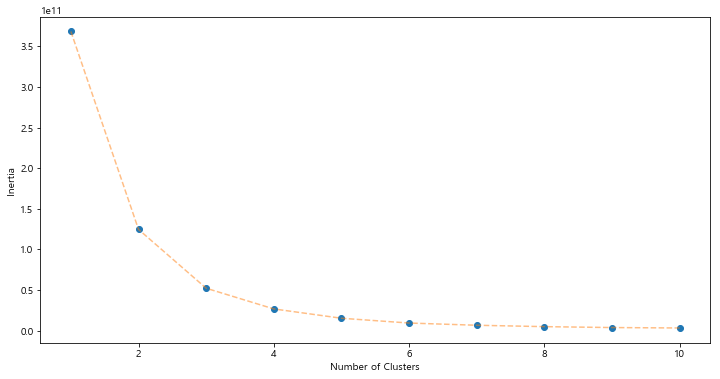

In [3]:
n_clusters = [1,2,3,4,5,6,7,8,9,10] #군집의 개수를 1~4개로 정하고 엘보우 분석을 실시
change_n_clusters(n_clusters, data) #생성했던 엘보우 분석을 위한 함수 호출

In [4]:
kmeans = KMeans(n_clusters=3) #엘보우 분석결과 k=2일때 적당함을 인지하고
kmeans.fit(data) #군집의 갯수를 2개로 하고 df데이터를 군집분석 실시

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [5]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)

    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):

        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

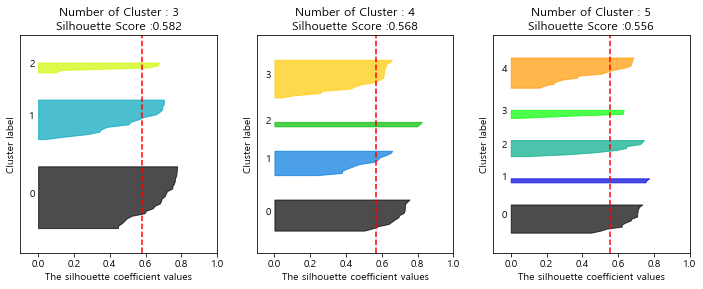

In [16]:
import numpy as np

visualize_silhouette([3, 4, 5], data)

[['서구' '양동' 12258.175 1246 41731]
 ['서구' '농성동' 11356.21 3110 134868]
 ['서구' '광천동' 7546.9 1442 169425]
 ['서구' '유덕동' 2004.19 2338 141329]
 ['서구' '치평동' 9526.91 7149 254355]
 ['서구' '쌍촌동' 15872.52 11150 231747]
 ['서구' '화정동' 17461.525 12145 256565]
 ['서구' '서창동' 266.67 825 184036]
 ['서구' '금호동' 18150.915 10599 200418]
 ['서구' '풍암동' 8031.59 8050 166638]
 ['서구' '동천동' 14425.42 2948 95216]
 ['북구' '중흥동' 10612.96333 3612 75984]
 ['북구' '중앙동' 5017.91 571 45054]
 ['북구' '임동' 6584.92 1240 53365]
 ['북구' '신안동' 8789.52 2381 86664]
 ['북구' '용봉동' 12321.66 9061 175126]
 ['북구' '운암동' 13924.283330000002 9382 208101]
 ['북구' '동림동' 6978.66 4034 94730]
 ['북구' '우산동(북)' 11793.68 1863 57590]
 ['북구' '풍향동' 9201.49 985 30925]
 ['북구' '문화동' 6071.92 3253 55048]
 ['북구' '문흥동' 14382.225 6874 90816]
 ['북구' '두암동' 9976.375 6974 121305]
 ['북구' '삼각동' 4388.96 3234 56056]
 ['북구' '일곡동' 17089.62 7138 73987]
 ['북구' '매곡동' 7759.89 2889 47467]
 ['북구' '오치동' 11427.575 5064 93108]
 ['북구' '석곡동' 56.69 338 61881]
 ['북구' '건국동' 1801.7 8064 390221]
 ['

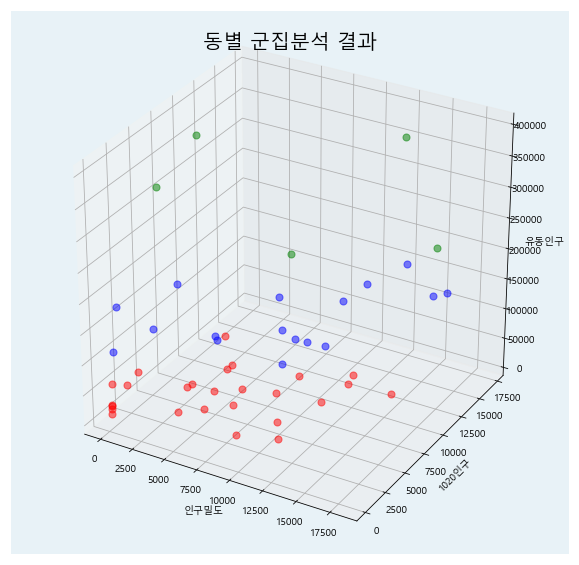

In [7]:
# https://frhyme.github.io/python-lib/matplotlib_3dplotting/
from mpl_toolkits.mplot3d import Axes3D # 3D 그래프를 그리기 위한 패키지

fig = plt.figure(figsize=(10, 10)) # 그리기 위한 판? 도화지? 생성
ax = fig.add_subplot(111, projection='3d')

# x, y, z축이 각각 어떤 값을 나타내는지 label 생성---------------------
x = df['인구밀도']
y = df['1020인구']
z = df['유동인구']

ax.set_xlabel('인구밀도')
ax.set_ylabel('1020인구')
ax.set_zlabel('유동인구')
#----------------------------------------------------------------------

# 1020인구, 유동인구, 인구밀도가 각각 x, y, z 좌표이므로 해당 컬럼만 추출------------
tmp_list = df.iloc[:, [0, 1, 2, 3, 5]].values
print(tmp_list)
print(tmp_list[0][2])
print(tmp_list[1][2])
# print로 찍어보면 dataframe 기준 0,2번째, 1,2번째에 있음을 확인 가능 (테스트용)----------

# kmeans.labels는 0,0,1,1,0으로 이루어짐
# 0은 0끼리 군집이고, 1은 1끼리 군집이다
tmp_colorlabel = []
for i in range(len(kmeans.labels_)):
    tmp_colorlabel.append(kmeans.labels_[i])
# 기존 kmeans.labels를 list로 만들어 보다 효율적으로 작동하게 한다 -------------------------

colors = np.array(["r","g","b", "pink", "orange"]) # 군집별 색깔 설정

for i in range(len(tmp_list)): # 좌표찍기, 여기서는 i가 5
    # 좌표를 팔레트에 찍는 코드 / x, y, z값을 각각 가져오고, tmp_colorlabel에 저장한 kmeans.labels_의 순서대로 광산구, 북구, 동구, 남구, 서구를 색칠한다
    # c는 색깔, s는 마커 사이즈, alpha는 투명도
    ax.scatter(tmp_list[i,2],tmp_list[i,3],tmp_list[i,4], c = colors[tmp_colorlabel[i]], s=50, alpha=0.5)
    # 좌표에 광산구, 서구, 북구 등의 label을 다는 코드 / tmp_list의 0번째 컬럼을 string으로 변환하고 달아준다. size는 라벨사이즈, color는 색
    #ax.text(tmp_list[i,2],tmp_list[i,3],tmp_list[i,4],  '%s' % (str(tmp_list[i,1])), size=10, color='k') 

plt.title('동별 군집분석 결과',size=20)
ax.set_facecolor('#E8F2F7') #그래프 배경을 skyblue로 하겠다.
plt.savefig('kmeans.jpg', dpi=300) #그래프 이미지를 저장하겠다.

print(df)
print(kmeans.labels_)
